In [7]:
%pylab inline
# from joblib import Parallel, delayed
import multiprocessing as mp
import matplotlib.pyplot as plt

from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import multiprocessing as mp
from multiprocessing import Pool, Value, Array
import time
from numba import njit

m_set = []

Populating the interactive namespace from numpy and matplotlib


/home/pouya/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
def mandelbrot_process(c, boundary, max_iterations=256):
    z = 0+0j
    i = 0
    while absolute(z) < absolute(boundary):
#         print('i:',i,'z:',z)
        if i == max_iterations:
            return True
        z = z*z + c
        i += 1
    return False

In [9]:
# def create_arange(start, end, step):
#     my_arange = []
#     my_arange.append([start, start+(end-start)/4, step])
#     new_start = start+(end-start)/4
#     my_arange.append([new_start, new_start+(end-start)/4, step])
#     newer_start = new_start+(end-start)/4
#     my_arange.append([newer_start, newer_start+(end-start)/4, step])
#     newest_start = newer_start+(end-start)/4
#     my_arange.append([newest_start, newest_start+(end-start)/4, step])
#     new_5 = newest_start+(end-start)/4
#     my_arange.append([new_5])
#     return my_arange

In [10]:
def mandelbrot(my_arange):
    start = my_arange[0]
    end = my_arange[1]
    step = my_arange[2]
    for i in arange(start, end, step):
        for j in arange(-2.0, 2.0, 0.001):
            if mandelbrot_process(complex(i,j), 2):
                m_set.append((i,j))
    return m_set

In [11]:
# my_arange = create_arange(-2.0, 2.0, 0.005)
step = 0.001
my_arange = [[-2.0, -1.5, step], [-1.5, -1.0, step], [-1.0, -0.5, step], [-0.5, 0.0, step], [0.0, 0.5, step], [0.5, 1.0, step], [1.0, 1.5, step], [1.5, 2.0, step]]

In [12]:
pool = mp.Pool()

In [13]:
%%time
res = pool.map(mandelbrot, my_arange)

CPU times: user 594 ms, sys: 11.5 s, total: 12.1 s
Wall time: 8min 54s


In [14]:
m_set = []
for i in range(len(res)):
    for j in range(len(res[i])):
        m_set.append(res[i][j])
len(m_set)

1521681

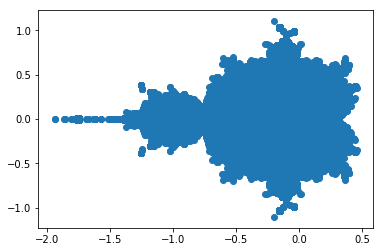

In [15]:
plt.scatter(*zip(*m_set))